# Batch Normalization & Data Imbalance Demonstration

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
df=pd.read_csv("Credit.csv")

In [7]:
df.head()

,Credit,RevolvingUtiOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NoOfDependents,NoRealEstateLoansOrLines,NoOfOpenCreditLinesAndLoans,NoofTime30_59DaysPastDue,NoOfTime60_89DaysPastDue,NorOfTimes90DaysLate
0,1,0.766127,45,0.802982,9120,2,6,13,2,0,0
1,0,0.957151,40,0.121876,2600,1,0,4,0,0,0
2,0,0.658180,38,0.085113,3042,0,0,2,1,0,1
3,0,0.233810,30,0.036050,3300,0,0,5,0,0,0
4,0,0.907239,49,0.024926,63588,0,1,7,1,0,0


In [8]:
df.shape

(8026, 11)

In [9]:
df.Credit.value_counts()

0    7509
1     517
Name: Credit, dtype: int64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Credit', ylabel='count'>

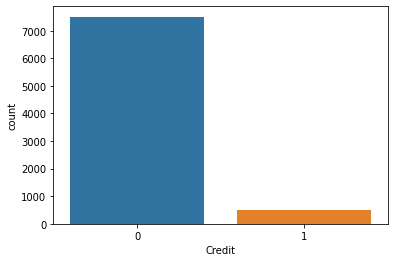

In [10]:
import seaborn as sns
sns.countplot(df.Credit)

In [11]:
df.Credit.value_counts()*100/df.shape[0]

0    93.558435
1     6.441565
Name: Credit, dtype: float64

In [12]:
x=df.iloc[:,1:]
y=df.Credit

In [13]:
# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(
   x, y, test_size=0.2, random_state=2)

In [14]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

In [15]:
x_train_std.shape

(6420, 10)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization,Input
from tensorflow.keras.metrics import Precision, Recall
from livelossplot import PlotLossesKerasTF

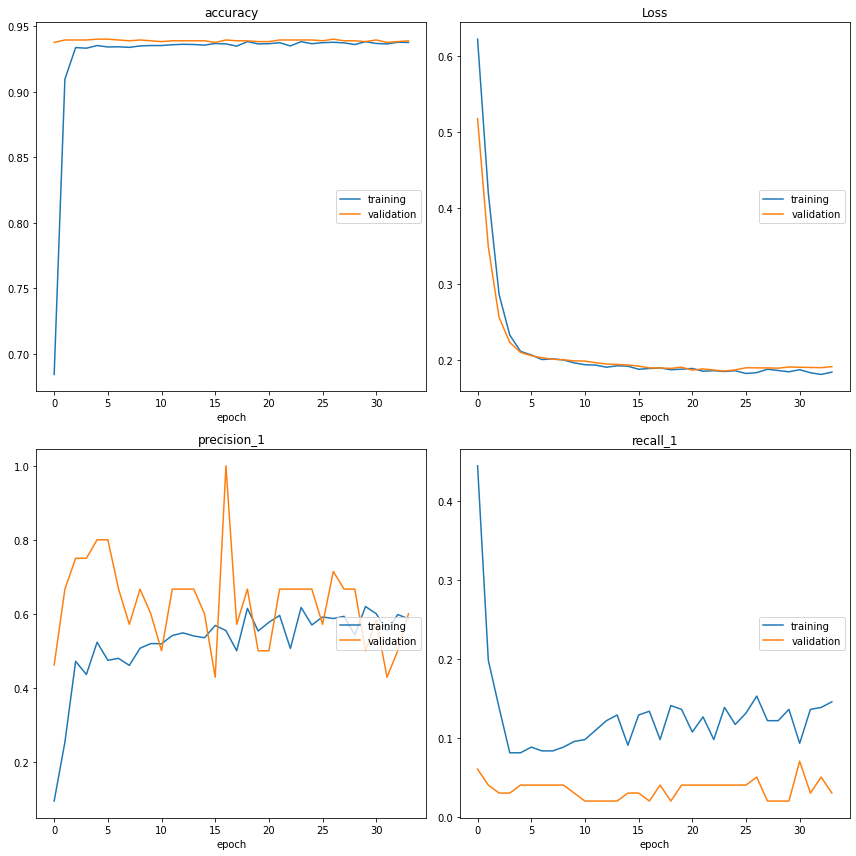

accuracy
	training         	 (min:    0.684, max:    0.938, cur:    0.938)
	validation       	 (min:    0.938, max:    0.940, cur:    0.939)
Loss
	training         	 (min:    0.181, max:    0.622, cur:    0.184)
	validation       	 (min:    0.186, max:    0.518, cur:    0.191)
precision_1
	training         	 (min:    0.094, max:    0.620, cur:    0.587)
	validation       	 (min:    0.429, max:    1.000, cur:    0.600)
recall_1
	training         	 (min:    0.081, max:    0.445, cur:    0.146)
	validation       	 (min:    0.020, max:    0.071, cur:    0.030)
101/101 [==============================] - 1s 8ms/step - loss: 0.1841 - accuracy: 0.9377 - precision_1: 0.5865 - recall_1: 0.1459 - val_loss: 0.1914 - val_accuracy: 0.9390 - val_precision_1: 0.6000 - val_recall_1: 0.0303
Epoch 35/50
 93/101 [==========================>...] - ETA: 0s - loss: 0.1830 - accuracy: 0.9383 - precision_1: 0.6310 - recall_1: 0.1362     

In [ ]:
model=Sequential()

model.add(Input(shape=(10,)))

model.add(Dense(20,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(20,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',Precision(),Recall()])

model.fit(x_train_std,y_train,epochs=50, batch_size=64,validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])

# Handling Data Imbalance

In [12]:
x=df.iloc[:,1:]
y=df.Credit

In [13]:
! pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


# Random Oversampling

In [14]:
from imblearn.over_sampling import RandomOverSampler

In [15]:
ro=RandomOverSampler()
x_train_oversampled,y_train_oversampled=ro.fit_resample(x,y)

In [16]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_oversampled)))


Original dataset shape Counter({0: 7509, 1: 517})
Resampled dataset shape Counter({1: 7509, 0: 7509})


In [17]:
print(x_train_oversampled.shape)
print(y_train_oversampled.shape)

(15018, 10)
(15018,)


In [18]:
# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split( x_train_oversampled,y_train_oversampled, test_size=0.2, random_state=2)

In [19]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

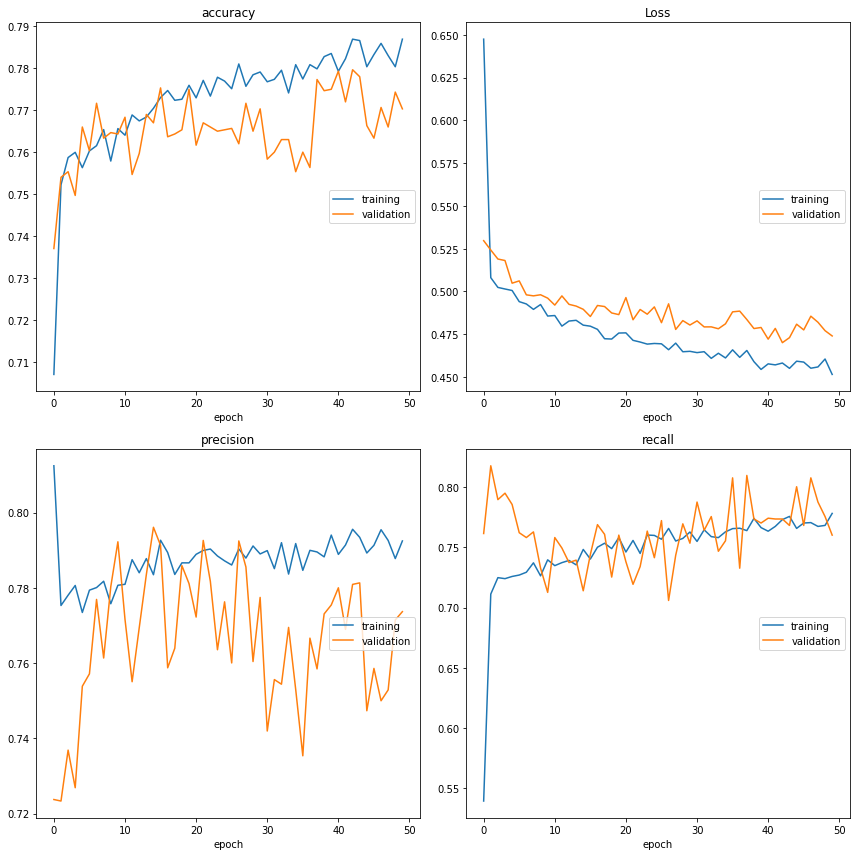

accuracy
	training         	 (min:    0.707, max:    0.787, cur:    0.787)
	validation       	 (min:    0.737, max:    0.780, cur:    0.770)
Loss
	training         	 (min:    0.451, max:    0.648, cur:    0.451)
	validation       	 (min:    0.470, max:    0.530, cur:    0.474)
precision
	training         	 (min:    0.773, max:    0.812, cur:    0.792)
	validation       	 (min:    0.723, max:    0.796, cur:    0.774)
recall
	training         	 (min:    0.539, max:    0.778, cur:    0.778)
	validation       	 (min:    0.706, max:    0.818, cur:    0.760)
188/188 [==============================] - 2s 9ms/step - loss: 0.4515 - accuracy: 0.7869 - precision: 0.7925 - recall: 0.7783 - val_loss: 0.4740 - val_accuracy: 0.7703 - val_precision: 0.7737 - val_recall: 0.7602


In [20]:
model.fit(x_train_std,y_train,epochs=50, batch_size=64,validation_data=(x_test_std,y_test),
          callbacks=[PlotLossesKerasTF()])

# SMOTE

In [21]:
from imblearn.over_sampling import SMOTE
smk = SMOTE()
x_train_smote,y_train_smote=smk.fit_resample(x,y)

In [22]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_smote)))

Original dataset shape Counter({0: 7509, 1: 517})
Resampled dataset shape Counter({1: 7509, 0: 7509})


In [23]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(15018, 10)
(15018,)


In [24]:
# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_train_smote,y_train_smote, test_size=0.2, random_state=2)

In [25]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std=scaler.fit_transform(x_test)

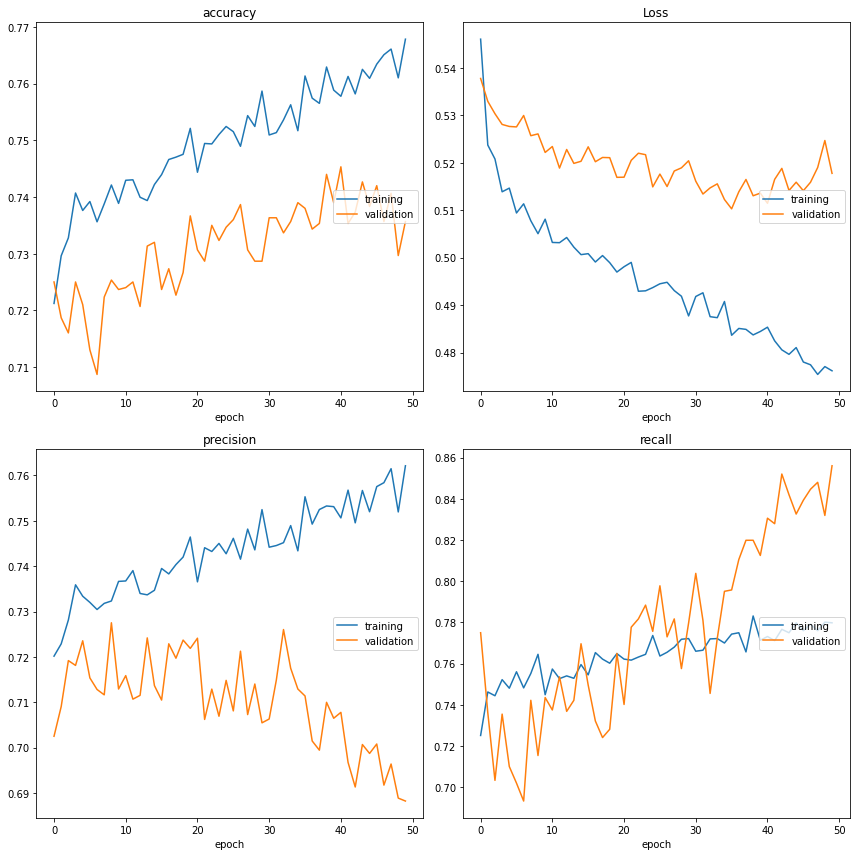

accuracy
	training         	 (min:    0.721, max:    0.768, cur:    0.768)
	validation       	 (min:    0.709, max:    0.745, cur:    0.736)
Loss
	training         	 (min:    0.475, max:    0.546, cur:    0.476)
	validation       	 (min:    0.510, max:    0.538, cur:    0.518)
precision
	training         	 (min:    0.720, max:    0.762, cur:    0.762)
	validation       	 (min:    0.688, max:    0.728, cur:    0.688)
recall
	training         	 (min:    0.725, max:    0.783, cur:    0.780)
	validation       	 (min:    0.693, max:    0.856, cur:    0.856)
121/121 [==============================] - 1s 12ms/step - loss: 0.4762 - accuracy: 0.7679 - precision: 0.7621 - recall: 0.7798 - val_loss: 0.5178 - val_accuracy: 0.7357 - val_precision: 0.6882 - val_recall: 0.8560


In [26]:

model.fit(x_train_std,y_train,epochs=50, batch_size=100,validation_data=(x_test_std,y_test),
          callbacks=[PlotLossesKerasTF()])
